In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

# **PREPROCESSING**

**Handle missing values**

In [ ]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


**Handle Outliers**

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

loan_id: 0 outliers
 no_of_dependents: 0 outliers
 income_annum: 0 outliers
 loan_amount: 0 outliers
 loan_term: 0 outliers
 cibil_score: 0 outliers
 residential_assets_value: 52 outliers
 commercial_assets_value: 37 outliers
 luxury_assets_value: 0 outliers
 bank_asset_value: 5 outliers


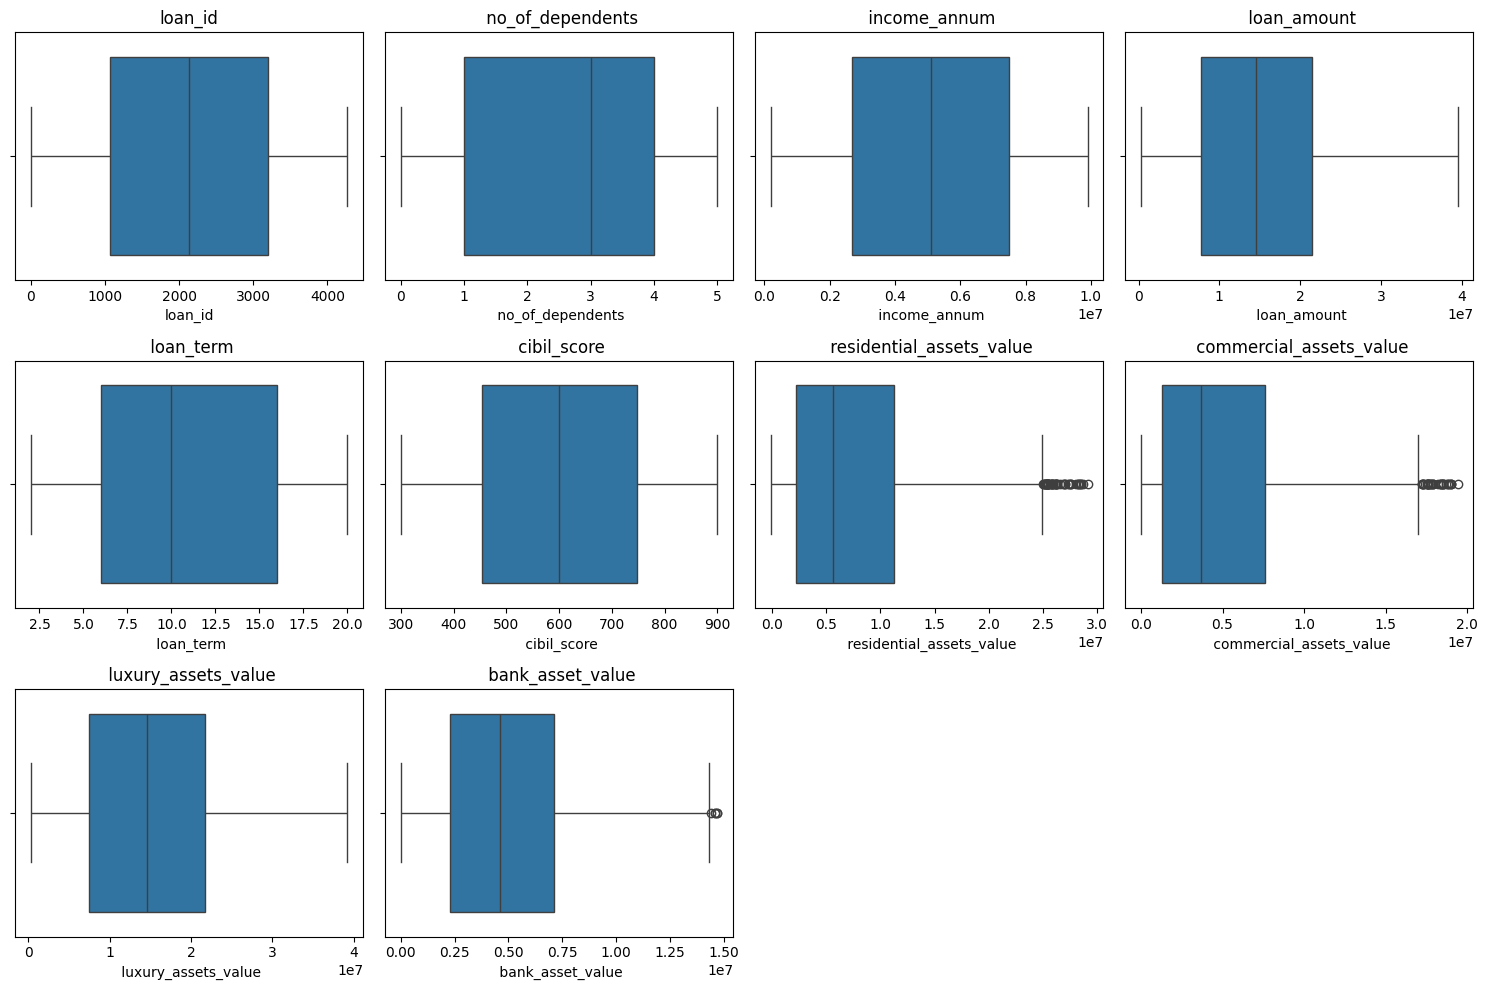

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**Merge assets**

In [ ]:
#Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

**Encode categorical variables**

In [ ]:
#Label Encoding the categorical variables
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

**Drop irrelevant columns**

In [ ]:
# Drop columns
df.drop(columns=['loan_id',' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


<Axes: >

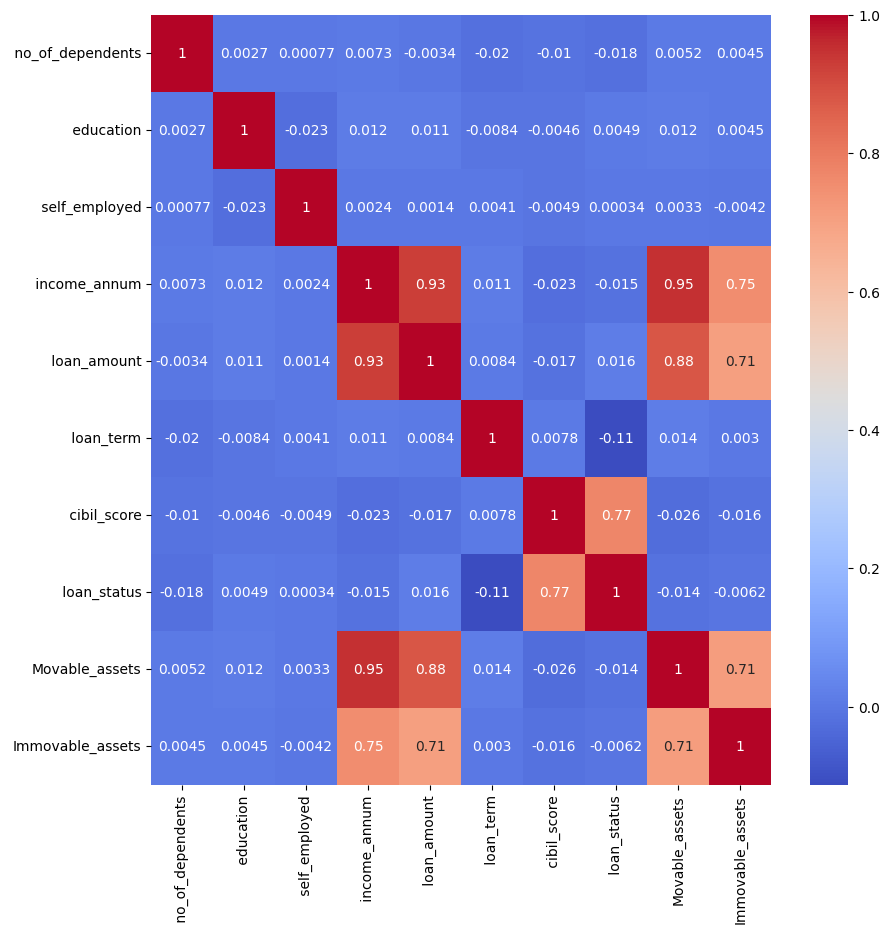

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

Correlation of 0.93 between income_annum and loan_amount means:

When income increases, loan amount tends to increase strongly.

**Split features and target**

In [ ]:
#Split features and target
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

**Split into train and test sets**

In [ ]:
#Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [ ]:
# Training the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X_train.shape

(3415, 9)

In [ ]:
X_test.shape

(854, 9)

In [ ]:
dtree.score(X_train, y_train)

1.0

In [ ]:
# Predicting the Loan Approval Status
X_test.shape
dtree_pred = dtree.predict(X_test)
print(dtree_pred)

[0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 

Text(50.722222222222214, 0.5, 'Actual')

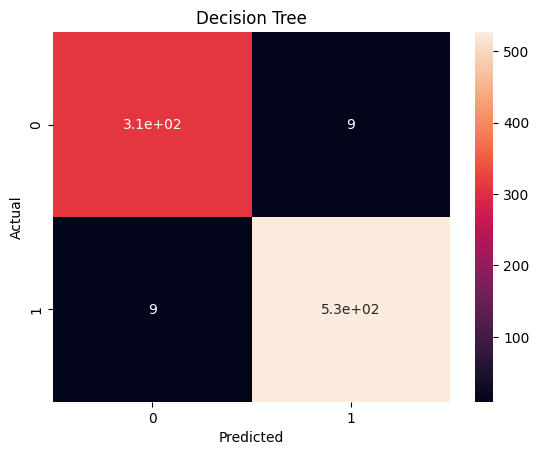

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figsize=(10,4)
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True).set_title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')


True Positives (TP) = 530
True Negatives (TN) = 310
False Positives (FP) = 8
False Negatives (FN) = 7

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

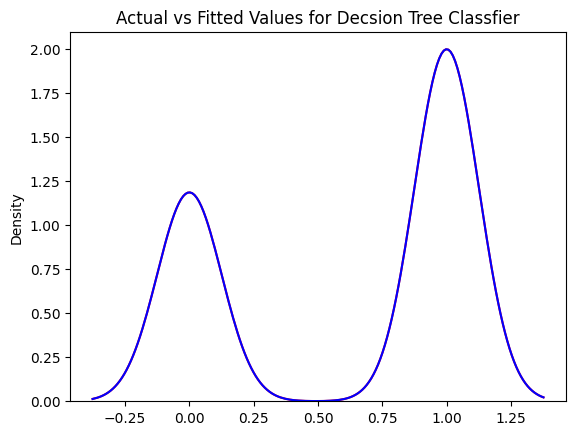

In [ ]:
sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values")
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

y_test (actual loan status labels) in red
dtree_pred (predicted loan status labels) in blue
Decision Tree predictions match the actual distribution very well.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')

R2 score:  0.9098141368628555
Mean Squared Error:  0.02107728337236534
Mean Absolute Error:  0.02107728337236534




In [ ]:
# Example applicant data
new_applicant = [[1, 1, 0, 8000000, 15000000, 12, 765, 2000000, 5000000]]

# Make prediction
result = dtree.predict(new_applicant)
print(f"Decision Tree Prediction: {result}")


Decision Tree Prediction: [1]
